Architecture of a neural netwrok regression.
1. Input layer shape - Same shape as number of features.
2. Hidden layer - minimum:1 , maximum: unlimited.
3. Neurons per hidden layer - Problem specific, generally 10 to 100.
4. Output layer shape : Same shape as desired predition shape.
5. Hidden activation - Usually ReLU
6. Output activation - None, ReLU, logistic/tanh
7. Loss function - MSE, MAE if outliers
8. Optimizer - SGD, Adam

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

## Steps in modelling with tensorflow
1. **Creating a model** - define the input and output layers as well as the hidden layers.
2. **Compiling a model** - define the loss function, optimizer, evaluation metrics.
3. Fitting a model - Letting a model to try to find patterns between features and labels.

In [3]:
import numpy as np
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = np.array( [3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [4]:
tf.random.set_seed(42)

#create a model using sequential API
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1))

#Compiling model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 7.6237 - mae: 7.6237
Epoch 2/10
1/1 [==============================] - 0s 34ms/step - loss: 7.4925 - mae: 7.4925
Epoch 3/10
1/1 [==============================] - 0s 31ms/step - loss: 7.4869 - mae: 7.4869
Epoch 4/10
1/1 [==============================] - 0s 25ms/step - loss: 7.4812 - mae: 7.4812
Epoch 5/10
1/1 [==============================] - 0s 27ms/step - loss: 7.4756 - mae: 7.4756
Epoch 6/10
1/1 [==============================] - 0s 31ms/step - loss: 7.4700 - mae: 7.4700
Epoch 7/10
1/1 [==============================] - 0s 19ms/step - loss: 7.4644 - mae: 7.4644
Epoch 8/10
1/1 [==============================] - 0s 42ms/step - loss: 7.4587 - mae: 7.4587
Epoch 9/10
1/1 [==============================] - 0s 31ms/step - loss: 7.4531 - mae: 7.4531
Epoch 10/10
1/1 [==============================] - 0s 34ms/step - loss: 7.4475 - mae: 7.4475


In [5]:
model.predict([17.0])

1/1 [==============================] - 0s 231ms/step


array([[29.214502]], dtype=float32)

### Improving the model

1. Creating a model - Here we can **add more layers**, increase the number of hidden units with each of the hidden layers, **change the activation functions** of each layer.
2. Compiling a model - Change the optimization function or maybe the **learning rate** of the function.
3. Fitting a model - Fit the model for **more epochs**.


The lower the learning rate, the smaller the steps the optimizer tells the neural network to improve.

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 512ms/step - loss: 8.8693 - mae: 8.8693
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 8.7368 - mae: 8.7368
Epoch 3/100
1/1 [==============================] - 0s 19ms/step - loss: 8.6043 - mae: 8.6043
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 8.4718 - mae: 8.4718
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 8.3393 - mae: 8.3393
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 8.2068 - mae: 8.2068
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 8.0743 - mae: 8.0743
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 7.9418 - mae: 7.9418
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.8093 - mae: 7.8093
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.6768 - mae: 7.6768
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - l

In [9]:
model.predict([17.0])

1/1 [==============================] - 1s 510ms/step


array([[29.81431]], dtype=float32)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=['mae'])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 493ms/step - loss: 10.2614 - mae: 10.2614
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 9.8114 - mae: 9.8114
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 9.3614 - mae: 9.3614
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 8.9114 - mae: 8.9114
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 8.4614 - mae: 8.4614
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 8.0114 - mae: 8.0114
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5614 - mae: 7.5614
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 7.1114 - mae: 7.1114
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 6.9000 - mae: 6.9000
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 6.8262 - mae: 6.8262
Epoch 11/100
1/1 [==============================] - 0s 11ms/step -

In [18]:
model.predict([17.0])

1/1 [==============================] - 0s 86ms/step


array([[27.022976]], dtype=float32)

### Evaluating the model


In [19]:
X = tf.range(-100, 100, 4)
y = X+10
X, y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

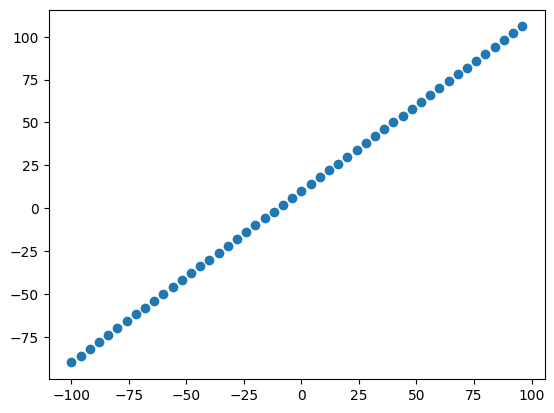

In [22]:
import matplotlib.pyplot as plt
plt.scatter(X, y);

Train, test and validation sets.
